In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns

In [2]:
!pwd

/home/user/energygpt/MixForecast/results/model_base


In [3]:
# datasets = ['BDG-2-c-24-p-24', 'Electricity-c-24-p-24', 'Buildings-900K-test-c-24-p-24']
# datasets = ['Prayas', 'MFRED', 'NEEA', 'NEST', 'Ireland', 'Mathura', 'Bareilly', 'DGS', 'IBlend', 'Enernoc']
#datasets_nonscalled = ['BDG-2_non_scaling', 'Electricity_nonscaling', 'Buildings-900k-test_nonscaling']
# datasets = ['Ireland-test', 'Mathura-test', 'Bareilly-test', 'NEEA-test', 'MFRED-test', 'NEST-test', 'SMART-star-test', 'Prayas-test']
# datasets = ['Mathura-timesFM', 'Bareilly-timesFM', 'Prayas-timesFM', 'Smart-star-timesFM', 'MFRED-timesFM', 'NEEA-timesFM', 
           # 'NEST-timesFM', 'Ireland-timesFM', 'Enernoc-timesFM', 'IBlend-timesFM']
# datasets = ['Enernoc-timesfm', 'Bareilly-timesfm', 'IBlend-timesfm', 'Ireland-timesfm', 
           # 'MFRED-timesfm', 'NEEA-timesfm', 'NEST-timesfm', 'Mathura-timesfm', 'Prayas-timesfm', 'Smart-star-timesfm']
datasets = ['Enernoc', 'IBlend']
# datasets = ['Bareilly', 'MFRED', 'NEEA', 
#            'NEST', 'Ireland', 'Mathura',
#            'Prayas', 'Smart-star', 'GoiEner', 'SGSC']

In [4]:
def load_results(datasets):
    results = []
    for dataset in datasets:
        print(dataset)
        df = pd.read_csv(f'{dataset}/result.csv')
        df.insert(0, 'dataset', dataset)            
        results.append(df)  
        print(df.shape)
    results_df = pd.concat(results)
    return results_df

In [5]:
# def fine_load_results(datasets):
#     results = []
#     for dataset in datasets:
#         print(dataset)
#         df = pd.read_csv(f'Fintuning_outputs/results/{dataset}/results_combined.csv')
#         df.insert(0, 'dataset', dataset)            
#         results.append(df)  
#         print(df.shape)
#     results_df = pd.concat(results)
#     return results_df

In [6]:
res = load_results(datasets)
print(res.shape)

Enernoc
(20, 6)
IBlend
(3, 6)
(23, 6)


In [7]:
# fine = fine_load_results(datasets)
# print(fine.shape)

In [8]:
# res.columns

In [9]:
res

,dataset,building_ID,CVRMSE,NRMSE,MAE,Avg_Test_Loss
0,Enernoc,enernoc_10,0.121318,12.131783,297.429960,0.143560
1,Enernoc,enernoc_56,0.181094,18.109402,110.441240,0.052120
2,Enernoc,enernoc_136,0.391337,39.133681,22.386820,0.107776
3,Enernoc,enernoc_304,0.050711,5.071121,5.041361,0.053777
4,Enernoc,enernoc_25,0.334682,33.468232,237.559900,0.099382
5,Enernoc,enernoc_761,0.734915,73.491539,183.688900,0.275726
6,Enernoc,enernoc_49,0.212175,21.217518,20.283613,0.079845
7,Enernoc,enernoc_731,0.908707,90.870690,14.687116,0.148489
8,Enernoc,enernoc_703,0.210518,21.051794,33.104183,0.094036
9,Enernoc,enernoc_45,0.121318,12.131783,297.792000,0.143560


In [10]:
cols = ['MAE', 'NRMSE']
res_agg1 = res[cols].agg( {'MAE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})
res_agg1

,MAE,NRMSE
mean,122.034115,27.191091
std,125.555244,21.108992
median,59.965790,21.217518


In [7]:
cols = ['NRMSE']
res_agg1 = res[cols].agg( {'NRMSE': ['mean', 'std', 'median']})
res_agg1

,NRMSE
mean,112.768398
std,53.706635
median,106.687216


In [12]:
# cols = ['dataset', 'sMAPE', 'nrmse','nrmse_eve']

# res_agg1 = res[cols].groupby(['dataset']).agg( {'sMAPE': ['mean', 'std', 'median'],
#                                                         'nrmse': ['mean', 'std', 'median'],
#                                               'nrmse_eve': ['mean', 'std', 'median'] })

# res_agg1.mul(100).round(2).to_csv('./results/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results/commercial.tex')
# res_agg1.mul(100).round(2)

In [8]:
# Zero-shot
cols = ['dataset',  'NRMSE']

res_agg1 = res[cols].groupby(['dataset']).agg({ #'sMAPE': ['mean', 'std', 'median'],
                                                      'NRMSE': ['mean', 'std', 'median'],}
                                             # 'nrmse_eve': ['mean', 'std', 'median'] }
                                             )
# res_agg1.mul(100).round(2).to_csv('./results/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results/commercial.tex')
res_agg1.round(2)

NRMSE                
              mean     std  median
dataset                           
Bareilly     78.74   44.06   64.80
GoiEner     126.95   51.95  118.27
Ireland      82.09   11.03   81.03
MFRED        24.78    2.52   24.56
Mathura     163.51  109.14  132.09
NEEA         82.95   80.56   70.52
NEST         64.74     NaN   64.74
Prayas      109.45   45.12  100.17
SGSC         96.24   34.17   91.47
Smart-star   62.98    8.81   61.02

In [14]:
# Fine-tuning
cols = ['dataset',  'nrmse']

fine_agg1 = fine[cols].groupby(['dataset']).agg({ #'sMAPE': ['mean', 'std', 'median'],
                                                      'nrmse': ['mean', 'std', 'median'],}
                                             # 'nrmse_eve': ['mean', 'std', 'median'] }
                                             )
# res_agg1.mul(100).round(2).to_csv('./results/commercial.csv')
# res_agg1.mul(100).round(2).to_latex('./results/commercial.tex')
fine_agg1.mul(100).round(2)

nrmse              
                  mean    std median
dataset                             
Enernoc-timesfm  30.07  21.72  26.02
IBlend-timesfm   20.38  13.67  16.06

In [12]:
new_df = res.copy()
new_df

,dataset,Unnamed: 0,building_name,mae,mape,mse,rmse,msle,rmsle,nrmse,nrmse_eve,sMAPE,filename
0,DGS,0,1st District Headquarters,0.063800,8.738615e+13,0.014473,0.120303,0.008157,0.090317,0.319560,0.474970,1.000000,DGS_processed_dataset.csv
1,DGS,0,1st District Substation,0.077943,9.319140e+13,0.019080,0.138129,0.010476,0.102353,0.345120,0.520940,1.000000,DGS_processed_dataset.csv
2,DGS,0,200 I Street Municipal Building,0.077202,7.387169e+13,0.019231,0.138676,0.010751,0.103687,0.450476,0.548551,1.000000,DGS_processed_dataset.csv
3,DGS,0,2nd District Headquarters,0.061764,8.826395e+13,0.013652,0.116842,0.008128,0.090153,0.337435,0.505746,1.000000,DGS_processed_dataset.csv
4,DGS,0,3rd District Headquarters,0.076452,7.780957e+13,0.015129,0.122999,0.008338,0.091314,0.399786,0.554163,1.000000,DGS_processed_dataset.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,EWELD,0,U95,0.110435,1.424391e+11,0.035223,0.187677,0.018130,0.134648,0.357137,0.839729,0.163490,EWELD-2021.csv
1844,EWELD,0,U96,0.115206,3.640763e+10,0.033508,0.183052,0.017297,0.131520,0.548957,0.709642,0.254744,EWELD-2021.csv
1845,EWELD,0,U97,0.101508,3.555659e+13,0.021216,0.145658,0.009984,0.099921,0.313107,0.655049,1.000000,EWELD-2021.csv
1846,EWELD,0,U98,0.122303,4.662695e+12,0.040693,0.201724,0.020962,0.144782,0.530203,0.740095,0.336993,EWELD-2021.csv


In [13]:
grouped = new_df.groupby(['dataset', 'building_name'])

In [14]:
d = {}
for each in new_df.dataset.unique():
    l = {}
    buildings = new_df[new_df['dataset'] == each]['building_name'].unique()
    for b in buildings:
        gh = grouped.get_group((each, b))
        # print(gh)
        l[b] = gh['mae'].mean()
        # print(gh['MAE'].mean())
        # break
    d[each] = l
    # break
d

{'DGS': {'1st District Headquarters': 0.0638003741331001,
  '1st District Substation': 0.0779433034356507,
  '200 I Street Municipal Building': 0.0772018023911616,
  '2nd District Headquarters': 0.0617644498273541,
  '3rd District Headquarters': 0.0764519766332151,
  '4th District Headquarters': 0.0724501286181554,
  '4th District Substation': 0.0628147225153348,
  '5th District Headquarters': 0.0739981975097556,
  '5th St. Bus Lot': 0.0793228805293279,
  '6th District Headquarters': 0.0624087189091789,
  '6th District Substation': 0.07095065688505,
  '7th District Headquarters': 0.0729873401180854,
  'Addison Elementary': 0.0587079927253912,
  'Aiton Elementary School': 0.0780057496362578,
  'Amidon-Bowen Elementary School': 0.0808716519111548,
  'Anacostia High School': 0.0747668686869175,
  'Anacostia Library': 0.0756423348394709,
  'Anacostia Recreation Center': 0.0668768640087615,
  'Arboretum Recreation Center': 0.0860219352989477,
  'Bald Eagle Recreation Center': 0.089695717872

In [15]:
import numpy as np
f = {}
for key, value in d.items():
    f[key] = (np.mean(list(value.values())))
f

{'Enernoc': 0.05960320793494,
 'IBlend': 0.038039310227192646,
 'EWELD': 0.0715906634970449}

In [18]:
import seaborn as sns
import seaborn

In [17]:
res

,dataset,cv_rmse,mae,nrmse,building_id
0,Bareilly,0.758212,0.043819,75.821238,Bareilly_2020_BR34
1,Bareilly,1.002927,0.062353,100.292651,Bareilly_2020_BR05
2,Bareilly,0.381162,0.164527,38.116203,Bareilly_2020_BR26
3,Bareilly,0.406173,0.057218,40.617310,Bareilly_2020_BR30
4,Bareilly,0.608474,0.320369,60.847426,Bareilly_2021_BR06
...,...,...,...,...,...
19,Smart-star,0.600211,26.277122,60.021097,Apt_2016_hour_Apt71
20,Smart-star,0.584706,34.778625,58.470638,Apt_2016_hour_Apt112
21,Smart-star,0.562662,31.287647,56.266250,Apt_2016_hour_Apt95
22,Smart-star,0.611970,19.435453,61.196962,Apt_2016_hour_Apt94


In [10]:
res

,dataset,building_ID,CVRMSE,NRMSE,MAE,Avg_Test_Loss
0,Enernoc,enernoc_10,0.102231,10.223077,255.872650,0.254593
1,Enernoc,enernoc_56,0.148215,14.821464,96.728020,0.076441
2,Enernoc,enernoc_136,0.367004,36.700369,22.473497,0.233029
3,Enernoc,enernoc_304,0.052148,5.214766,5.336231,0.126296
4,Enernoc,enernoc_25,0.294051,29.405072,222.243480,0.165929
5,Enernoc,enernoc_761,0.753378,75.337784,204.266340,0.654186
6,Enernoc,enernoc_49,0.188311,18.831058,19.615692,0.138466
7,Enernoc,enernoc_731,0.913706,91.370627,16.475390,0.360112
8,Enernoc,enernoc_703,0.194249,19.424944,32.794880,0.186992
9,Enernoc,enernoc_45,0.102231,10.223077,256.184100,0.254593


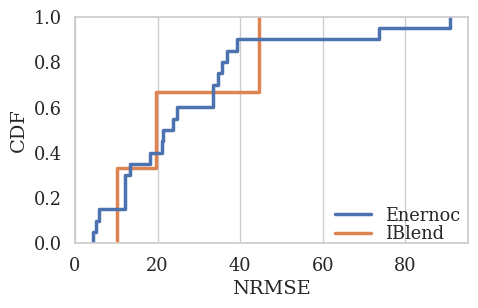

In [12]:
# sns.set(font_scale=1)  # crazy big
sns.set_theme(style="whitegrid", font_scale=1.16)


date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# plt.figure(figsize=(3, 3))
fig, ax = plt.subplots()

copy_df = res['NRMSE'].reset_index()
copy_df = copy_df[copy_df.NRMSE >= 0]

# all_df = pd.DataFrame(copy_df['NRMSE'])
# #assembly_df
# all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# # all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black')
# ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black', lw=1.5)

# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
copy_df = res.reset_index()
copy_df = copy_df[copy_df.NRMSE >= 0]
# copy_df['nrmse'] = copy_df['nrmse']
copy_df = copy_df.sort_values('NRMSE')
# copy_df['dataset'] = copy_df['dataset'].apply(lambda x: str(x.split('-timesfm')[0]))
# name = ['Mean', 'LCL', 'BOREALIS', 'IDEAL', 'SMART', 'SCEAUX']
ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset', ax=ax, lw=2.5)


# for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['--', '-', 'dashdot'], ax.legend_.legend_handles):
#     lines.set_linestyle(linestyle)
#     legend_handle.set_linestyle(linestyle)

#plt.xlim(0,80)
# ax_s.set_xscale('log')
# ax_s.set_xlim(0, 250)
# ax.legend(labels=name)
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False, bbox_to_anchor=(1.02, -0.07))

plt.title(label='')
# plt.legend()
plt.ylabel("CDF")
#plt.ylim(0,125)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("Plots/Mixforecast-test-commercial-error-cdfplot.pdf", bbox_inches='tight')
plt.show()

In [21]:
pwd

'/home/user/Shivam/timesfm/notebooks'

# Plots

In [2]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale, MinMaxScaler

In [16]:
import random
option_dataset_2 = 'Enernoc'

# if option_dataset_2 in ['BDG-2', 'Electricity']:
#         files_list = files_list = glob.glob(f'/home/user/BuildingsBenchNREL/BuildingsBenchData/BuildingsBench/{option_dataset_2}/*.csv')
# else:
# files_list = glob.glob('/home/user/New_Buildings_Datasets/Commercial/Enernoc/csv-only/processed/*.csv')
# files_list = glob.glob('/home/user/New_Buildings_Datasets/Residential/Mathura_and_Bareilly/dataverse_files/processed/Bareilly/hourly/*nan.csv')
    

# option_file = random.sample(files_list, k=1)[0]
# option_file
# option_file = '/home/user/New_Buildings_Datasets/Residential/Mathura_and_Bareilly/dataverse_files/processed/Bareilly/hourly/Bareilly_2021.csv'
option_files = glob.glob(f"/home/user/New_Buildings_Datasets/Test/{option_dataset_2}/*.csv")
option_files

['/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_136.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_49.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_401.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_304.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_45.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_808.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_25.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_716.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_765.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_56.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_21.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_10.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_731.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_718.csv',
 '/home/user/New_Buildings_Datasets/Test/Enernoc/enernoc_737.csv',
 

In [17]:
df = pd.read_csv(option_files[3])
df = df.set_index(['time'])
scaler = MinMaxScaler()
scaler.fit(df['energy'].values.reshape(-1, 1))
# buildings = list(df.columns.unique())
# building = random.sample(buildings, k=1)[0]
# building

MinMaxScaler()

In [19]:
df

,energy
time,
2012-01-01 00:00:00,138.0682
2012-01-01 01:00:00,150.3410
2012-01-01 02:00:00,163.3807
2012-01-01 03:00:00,158.0114
2012-01-01 04:00:00,161.0798
...,...
2012-12-31 20:00:00,154.1762
2012-12-31 21:00:00,151.1080
2012-12-31 22:00:00,146.5057


In [18]:
building = '304'

In [20]:
# forecasts_mixbeats = pd.read_csv('/home/user/Shivam/timesfm/notebooks/Mixbeats/bareilly_br33.csv')
forecasts_mixbeats = pd.read_csv('enernoc_304-mix-forecast.csv')
forecasts_mixbeats

,timestamp,y_true,y_pred,building
0,2020-01-08 00:00:00,152.64200,154.00570,304
1,2020-01-08 01:00:00,146.50569,152.78326,304
2,2020-01-08 02:00:00,158.77860,161.34581,304
3,2020-01-08 03:00:00,156.47739,157.24650,304
4,2020-01-08 04:00:00,157.24419,155.74011,304
...,...,...,...,...
8611,2020-12-31 19:00:00,130.39810,137.99327,304
8612,2020-12-31 20:00:00,154.17620,145.80826,304
8613,2020-12-31 21:00:00,151.10799,151.14613,304
8614,2020-12-31 22:00:00,146.50569,147.86452,304


In [21]:
forecasts_mixbeats.timestamp = pd.to_datetime(forecasts_mixbeats.timestamp)
forecasts_mixbeats.timestamp = forecasts_mixbeats.timestamp.apply(lambda x: x.replace(year = x.year - 8))
forecasts_mixbeats = forecasts_mixbeats.set_index(['timestamp'])
forecasts_mixbeats

,y_true,y_pred,building
timestamp,,,
2012-01-08 00:00:00,152.64200,154.00570,304
2012-01-08 01:00:00,146.50569,152.78326,304
2012-01-08 02:00:00,158.77860,161.34581,304
2012-01-08 03:00:00,156.47739,157.24650,304
2012-01-08 04:00:00,157.24419,155.74011,304
...,...,...,...
2012-12-31 19:00:00,130.39810,137.99327,304
2012-12-31 20:00:00,154.17620,145.80826,304
2012-12-31 21:00:00,151.10799,151.14613,304


In [22]:
# option_window = random.sample(list(range(0,100)), k=1)[0]
option_window = 39
titles = []
for i in range(option_window - 1, option_window + 2):
    titles.append(f'{building}-{i+1}')
titles

['304-39', '304-40', '304-41']

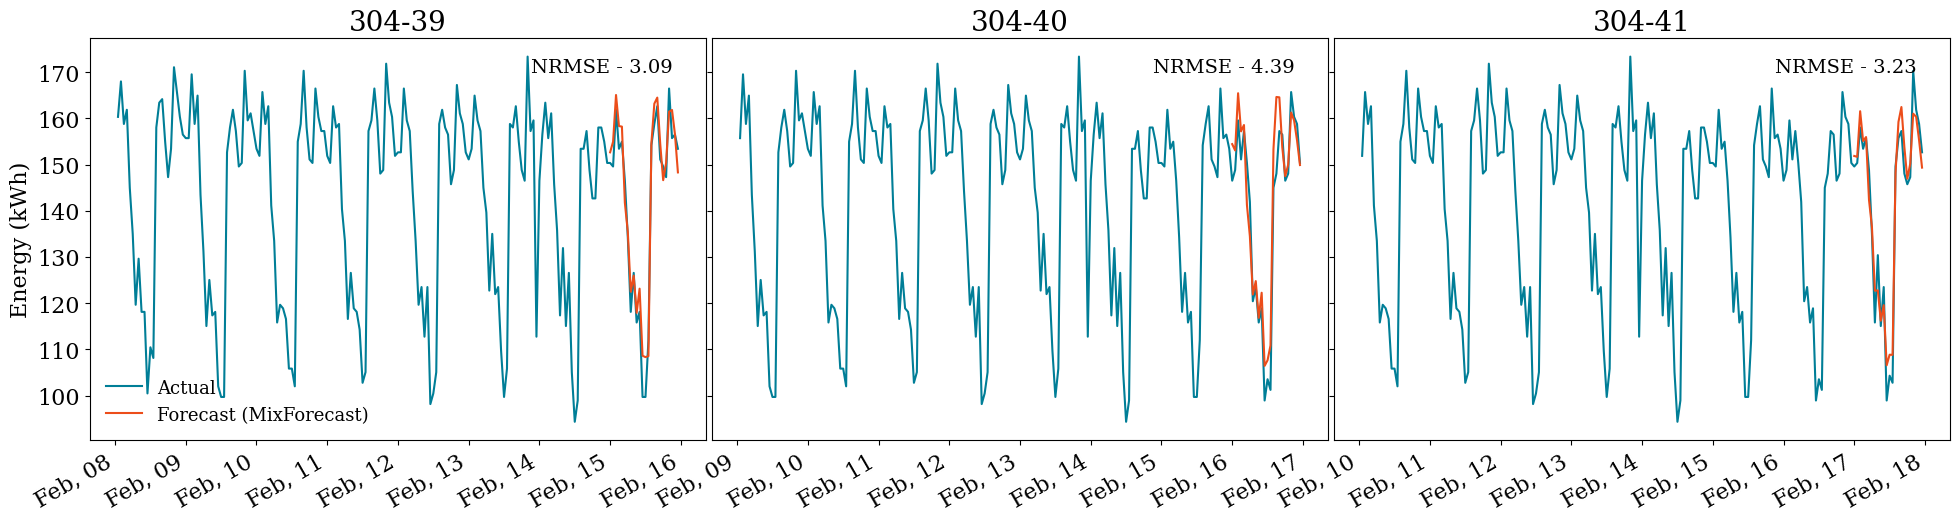

In [29]:
from sklearn.metrics import root_mean_squared_error

date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 16})
plt.rcParams["font.family"] = "serif"
# plt.rcParams["figure.figsize"] = (20, 6)#(7.5, 3.3*1.5)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, axs = plt.subplots(nrows = 1,
                        ncols = 3,
                        figsize= (20, 5.5)
                       )
col = 'energy'
os.makedirs('Plots', exist_ok=True)
c = 0
r = 0
s = 0

#Mix-beats
for i in range(option_window - 1, option_window + 2):

    # date_formater = mdates.DateFormatter('%b, %d')
    # plt.rcParams.update({'font.size': 20})
    # fig, ax = plt.subplots()
    # df_t.iloc[:384].plot(ax=ax)
    # df_b.iloc[:218][['y_pred']].plot(ax=ax)
    df = df[[col]]
    df.index = pd.to_datetime(df.index)
    # ax = plt.subplot(1, 3, c+1)
    timeindex = forecasts_mixbeats.iloc[i*24:(i*24)+24].index
    # range of dates 
    date_range = pd.period_range( 
        end=timeindex[0], periods=168, freq='h') 
      
    # timestamp range 
    timestamp_range = [x.to_timestamp() for x in date_range] + list(timeindex)
    # print(len(timestamp_range))
    # print(timestamp_range)
    df.loc[timestamp_range].plot(ax=axs[s], color='#007E97')
    # df.iloc[i*24:(i*24)+192].plot(ax=ax, lw=4, color='#007E97')
    # forecasts.iloc[i*24:(i*24)+24][['y_pred']].plot(ax=ax, lw=4, color='#EC4D1A', alpha=0.7) 
    forecasts_mixbeats.loc[timeindex][['y_pred']].plot(ax=axs[s], color='#EC4D1A')
    
    rmse= root_mean_squared_error(forecasts_mixbeats.loc[timeindex]['y_true'], forecasts_mixbeats.loc[timeindex]['y_pred'])
    nrmse = rmse / (forecasts_mixbeats.loc[timeindex]['y_true'].mean())
    # print(nrmse * 100)
    axs[s].text(timestamp_range[140], 170, f'NRMSE - {round(nrmse*100, 2)}', fontsize = 14)
    # axs[0, s].text(0.00056, 0.005, 'Parabola $Y = x^2$', fontsize = 22)
    
    # forecasts.loc[timeindex][['y_pred']].plot(ax=ax, lw=4, color='#EC4D1A', alpha=0.7)
    # plt.xticks(rotation=90)
    # ax.xaxis.set_major_formatter(date_formater)
    axs[s].set_title(titles[s], fontsize=20)
    axs[s].set_xlabel('')
    axs[s].set_xticklabels([])
    # axs[0, c].set_ylim(0,150)
    axs[s].xaxis.set_major_formatter(date_formater)
    
    if s == 0:
        axs[s].set_ylabel("Energy (kWh)")
        axs[s].legend(['Actual', 'Forecast (MixForecast)'], loc='lower left', frameon=False, shadow=True, prop={'size': 13})#, borderpad=True,
        
    if s != 0:
        axs[s].set_yticklabels([])
        axs[s].legend([], frameon=False)

    axs[s].grid(False)
    s += 1
    

plt.gcf().tight_layout()
# plt.legend()
plt.subplots_adjust(wspace=0.01, hspace=0)

plt.savefig(f"Plots/mixforecast-{option_dataset_2}-{building}-{option_window}.pdf", bbox_inches='tight')
# plt.savefig(f"Plots/moirai-{option_dataset_2}-{building}-{option_window}.svg", format='svg', dpi=1500, bbox_inches='tight')
plt.show()
